# Music Genre Classification using KNN
## K-Nearest Neighbours
In this notebook, I have loaded a music genre dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is K-Nearest Neighbors?

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


# Let's load required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

# Load Data from csv File

In [2]:
df = pd.read_csv('Music_Genre_Data.csv')
df.head()

,Unnamed: 0,Name,Genre,AE_Mean,AE_Std,RMS_Mean,RMS_Std,ZCR_Mean,ZCR_Std,BER_Mean,...,MFCC8_Mean,MFCC8_Std,MFCC9_Mean,MFCC9_Std,MFCC10_Mean,MFCC10_Std,MFCC11_Mean,MFCC11_Std,MFCC12_Mean,MFCC12_Std
0,0,00 Keep Me Around.mp3,blues,0.413604,0.336156,0.209677,0.194919,0.025376,0.029535,NaN,...,0.524046,8.763070,4.678653,10.146228,-0.636792,9.801187,0.803112,8.547368,-1.271596,7.959494
1,1,02 Bring That Fire.mp3,blues,0.718112,0.168150,0.255997,0.080424,0.112043,0.059497,38.635887,...,-8.507063,8.077289,16.341509,7.302747,-3.145405,7.970468,10.843008,7.164038,-1.324588,7.707904
2,2,02 Brown Skin Girl.mp3,blues,0.616966,0.254200,0.253166,0.139158,0.068955,0.067955,290.161600,...,-3.386870,13.729054,16.733223,12.982227,-2.605393,11.408111,13.568317,10.142110,-0.078747,9.629934
3,3,02 Built By Nations.mp3,blues,0.468483,0.090312,0.188463,0.057775,0.100229,0.033683,22.235285,...,-2.887919,7.030292,9.343019,7.367812,-3.488164,6.622704,6.762663,7.461549,-8.813975,8.551544
4,4,02 Broken Boy.mp3,blues,0.836942,0.138522,0.351950,0.102473,0.094648,0.047091,55.915676,...,0.439476,7.986229,11.720238,7.580385,-6.271586,7.267283,8.465326,6.732004,-6.825080,5.850800


# Data Visualization and Analysis

In [3]:
df.dtypes

Unnamed: 0       int64
Name            object
Genre           object
AE_Mean        float64
AE_Std         float64
RMS_Mean       float64
RMS_Std        float64
ZCR_Mean       float64
ZCR_Std        float64
BER_Mean       float64
BER_Std        float64
SC_Mean        float64
SC_Std         float64
BW_Mean        float64
BW_Std         float64
MFCC0_Mean     float64
MFCC0_Std      float64
MFCC1_Mean     float64
MFCC1_Std      float64
MFCC2_Mean     float64
MFCC2_Std      float64
MFCC3_Mean     float64
MFCC3_Std      float64
MFCC4_Mean     float64
MFCC4_Std      float64
MFCC5_Mean     float64
MFCC5_Std      float64
MFCC6_Mean     float64
MFCC6_Std      float64
MFCC7_Mean     float64
MFCC7_Std      float64
MFCC8_Mean     float64
MFCC8_Std      float64
MFCC9_Mean     float64
MFCC9_Std      float64
MFCC10_Mean    float64
MFCC10_Std     float64
MFCC11_Mean    float64
MFCC11_Std     float64
MFCC12_Mean    float64
MFCC12_Std     float64
dtype: object

In [4]:
df.describe()

,Unnamed: 0,AE_Mean,AE_Std,RMS_Mean,RMS_Std,ZCR_Mean,ZCR_Std,BER_Mean,BER_Std,SC_Mean,...,MFCC8_Mean,MFCC8_Std,MFCC9_Mean,MFCC9_Std,MFCC10_Mean,MFCC10_Std,MFCC11_Mean,MFCC11_Std,MFCC12_Mean,MFCC12_Std
count,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,1.938300e+04,1.938300e+04,27501.000000,...,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000
mean,13750.000000,0.497027,0.181176,0.194156,0.085674,0.089451,0.055508,1.355724e+27,inf,1914.208916,...,-6.793407,10.238448,7.685111,9.826224,-6.151084,9.254481,5.516806,8.800515,-5.717512,8.590674
std,7938.999213,0.229019,0.074813,0.094700,0.040884,0.035390,0.025902,1.305061e+29,NaN,553.209376,...,6.580735,2.931959,6.403885,2.666399,5.577384,2.480796,5.421237,2.251107,4.731295,2.176654
min,0.000000,-0.000437,0.000000,0.000000,0.000000,0.000000,0.000000,7.349587e-02,5.994551e-02,0.000000,...,-48.111794,0.000000,-35.094646,0.000000,-35.934734,0.000000,-31.177902,0.000000,-40.247192,0.000000
25%,6875.000000,0.327570,0.131121,0.122370,0.057129,0.066353,0.038373,2.562871e+01,4.029226e+01,1572.463417,...,-10.353065,8.226035,4.222171,8.001241,-9.345098,7.551906,2.599039,7.294085,-8.488600,7.129545
50%,13750.000000,0.521295,0.182465,0.200132,0.082460,0.086606,0.051144,7.803704e+01,1.815349e+02,1942.251855,...,-6.265254,9.937851,8.461375,9.625252,-5.862081,9.054933,6.227400,8.637455,-5.727238,8.466826
75%,20625.000000,0.683220,0.230615,0.267320,0.113337,0.109571,0.067607,2.999927e+02,9.707720e+02,2286.566287,...,-2.511854,11.997938,11.937708,11.462139,-2.705712,10.785304,9.170105,10.164124,-2.827818,9.885674
max,27500.000000,1.033104,0.489485,0.643854,0.277205,0.642743,0.326102,1.714600e+31,inf,7140.231790,...,30.514725,27.343313,30.513494,31.634895,27.458527,30.226973,36.778534,29.764890,17.423120,24.876154


In [5]:
df.drop(['Unnamed: 0', 'Name'], axis=1, inplace=True)

In [6]:
df.describe()

,AE_Mean,AE_Std,RMS_Mean,RMS_Std,ZCR_Mean,ZCR_Std,BER_Mean,BER_Std,SC_Mean,SC_Std,...,MFCC8_Mean,MFCC8_Std,MFCC9_Mean,MFCC9_Std,MFCC10_Mean,MFCC10_Std,MFCC11_Mean,MFCC11_Std,MFCC12_Mean,MFCC12_Std
count,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,1.938300e+04,1.938300e+04,27501.000000,27501.000000,...,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000
mean,0.497027,0.181176,0.194156,0.085674,0.089451,0.055508,1.355724e+27,inf,1914.208916,735.508070,...,-6.793407,10.238448,7.685111,9.826224,-6.151084,9.254481,5.516806,8.800515,-5.717512,8.590674
std,0.229019,0.074813,0.094700,0.040884,0.035390,0.025902,1.305061e+29,NaN,553.209376,274.971078,...,6.580735,2.931959,6.403885,2.666399,5.577384,2.480796,5.421237,2.251107,4.731295,2.176654
min,-0.000437,0.000000,0.000000,0.000000,0.000000,0.000000,7.349587e-02,5.994551e-02,0.000000,0.000000,...,-48.111794,0.000000,-35.094646,0.000000,-35.934734,0.000000,-31.177902,0.000000,-40.247192,0.000000
25%,0.327570,0.131121,0.122370,0.057129,0.066353,0.038373,2.562871e+01,4.029226e+01,1572.463417,554.225024,...,-10.353065,8.226035,4.222171,8.001241,-9.345098,7.551906,2.599039,7.294085,-8.488600,7.129545
50%,0.521295,0.182465,0.200132,0.082460,0.086606,0.051144,7.803704e+01,1.815349e+02,1942.251855,715.709600,...,-6.265254,9.937851,8.461375,9.625252,-5.862081,9.054933,6.227400,8.637455,-5.727238,8.466826
75%,0.683220,0.230615,0.267320,0.113337,0.109571,0.067607,2.999927e+02,9.707720e+02,2286.566287,886.814209,...,-2.511854,11.997938,11.937708,11.462139,-2.705712,10.785304,9.170105,10.164124,-2.827818,9.885674
max,1.033104,0.489485,0.643854,0.277205,0.642743,0.326102,1.714600e+31,inf,7140.231790,3074.685389,...,30.514725,27.343313,30.513494,31.634895,27.458527,30.226973,36.778534,29.764890,17.423120,24.876154


In [7]:
print("number of NaN values for the column AE_Mean :", df['AE_Mean'].isnull().sum())
print("number of NaN values for the column AE_Std :", df['AE_Std'].isnull().sum())
print("number of NaN values for the column RMS_Mean :", df['RMS_Mean'].isnull().sum())
print("number of NaN values for the column RMS_Std :", df['RMS_Std'].isnull().sum())
print("number of NaN values for the column ZCR_Mean :", df['ZCR_Mean'].isnull().sum())
print("number of NaN values for the column ZCR_Std :", df['ZCR_Std'].isnull().sum())
print("number of NaN values for the column BER_Mean :", df['BER_Mean'].isnull().sum())
print("number of NaN values for the column BER_Std :", df['BER_Std'].isnull().sum())
print("number of NaN values for the column SC_Mean :", df['SC_Mean'].isnull().sum())
print("number of NaN values for the column SC_Std :", df['SC_Std'].isnull().sum())
print("number of NaN values for the column BW_Mean :", df['BW_Mean'].isnull().sum())
print("number of NaN values for the column BW_Std :", df['BW_Std'].isnull().sum())
print("number of NaN values for the column MFCC0_Mean :", df['MFCC0_Mean'].isnull().sum())
print("number of NaN values for the column MFCC0_Std :", df['MFCC0_Std'].isnull().sum())
print("number of NaN values for the column MFCC1_Mean :", df['MFCC1_Mean'].isnull().sum())
print("number of NaN values for the column MFCC1_Std :", df['MFCC1_Std'].isnull().sum())
print("number of NaN values for the column MFCC2_Mean :", df['MFCC2_Mean'].isnull().sum())
print("number of NaN values for the column MFCC2_Std :", df['MFCC2_Std'].isnull().sum())
print("number of NaN values for the column MFCC3_Mean :", df['MFCC3_Mean'].isnull().sum())
print("number of NaN values for the column MFCC3_Std :", df['MFCC3_Std'].isnull().sum())
print("number of NaN values for the column MFCC4_Mean :", df['MFCC4_Mean'].isnull().sum())
print("number of NaN values for the column MFCC4_Std :", df['MFCC4_Std'].isnull().sum())
print("number of NaN values for the column MFCC5_Mean :", df['MFCC5_Mean'].isnull().sum())
print("number of NaN values for the column MFCC5_Std :", df['MFCC5_Std'].isnull().sum())
print("number of NaN values for the column MFCC6_Mean :", df['MFCC6_Mean'].isnull().sum())
print("number of NaN values for the column MFCC6_Std :", df['MFCC6_Std'].isnull().sum())
print("number of NaN values for the column MFCC7_Mean :", df['MFCC7_Mean'].isnull().sum())
print("number of NaN values for the column MFCC7_Std :", df['MFCC7_Std'].isnull().sum())
print("number of NaN values for the column MFCC8_Mean :", df['MFCC8_Mean'].isnull().sum())
print("number of NaN values for the column MFCC8_Std :", df['MFCC8_Std'].isnull().sum())
print("number of NaN values for the column MFCC9_Mean :", df['MFCC9_Mean'].isnull().sum())
print("number of NaN values for the column MFCC9_Std :", df['MFCC9_Std'].isnull().sum())
print("number of NaN values for the column MFCC10_Mean :", df['MFCC10_Mean'].isnull().sum())
print("number of NaN values for the column MFCC10_Std :", df['MFCC10_Std'].isnull().sum())
print("number of NaN values for the column MFCC11_Mean :", df['MFCC11_Mean'].isnull().sum())
print("number of NaN values for the column MFCC11_Std :", df['MFCC11_Std'].isnull().sum())
print("number of NaN values for the column MFCC12_Mean :", df['MFCC12_Mean'].isnull().sum())
print("number of NaN values for the column MFCC12_Std :", df['MFCC12_Std'].isnull().sum())

number of NaN values for the column AE_Mean : 0
number of NaN values for the column AE_Std : 0
number of NaN values for the column RMS_Mean : 0
number of NaN values for the column RMS_Std : 0
number of NaN values for the column ZCR_Mean : 0
number of NaN values for the column ZCR_Std : 0
number of NaN values for the column BER_Mean : 8118
number of NaN values for the column BER_Std : 8118
number of NaN values for the column SC_Mean : 0
number of NaN values for the column SC_Std : 0
number of NaN values for the column BW_Mean : 0
number of NaN values for the column BW_Std : 0
number of NaN values for the column MFCC0_Mean : 0
number of NaN values for the column MFCC0_Std : 0
number of NaN values for the column MFCC1_Mean : 0
number of NaN values for the column MFCC1_Std : 0
number of NaN values for the column MFCC2_Mean : 0
number of NaN values for the column MFCC2_Std : 0
number of NaN values for the column MFCC3_Mean : 0
number of NaN values for the column MFCC3_Std : 0
number of NaN 

In [8]:
df.dropna(axis=1,inplace=True)
print(df)

       Genre   AE_Mean    AE_Std  RMS_Mean   RMS_Std  ZCR_Mean   ZCR_Std  \
0      blues  0.413604  0.336156  0.209677  0.194919  0.025376  0.029535   
1      blues  0.718112  0.168150  0.255997  0.080424  0.112043  0.059497   
2      blues  0.616966  0.254200  0.253166  0.139158  0.068955  0.067955   
3      blues  0.468483  0.090312  0.188463  0.057775  0.100229  0.033683   
4      blues  0.836942  0.138522  0.351950  0.102473  0.094648  0.047091   
...      ...       ...       ...       ...       ...       ...       ...   
27496  blues  0.206766  0.120584  0.077707  0.045364  0.079399  0.057566   
27497  blues  0.304419  0.135110  0.112034  0.046866  0.054528  0.038094   
27498  blues  0.376556  0.183310  0.164256  0.075047  0.019666  0.008442   
27499  blues  0.616610  0.194756  0.242773  0.096617  0.088570  0.052360   
27500  blues  0.331972  0.189584  0.151057  0.102100  0.064456  0.094980   

           SC_Mean       SC_Std      BW_Mean  ...  MFCC8_Mean  MFCC8_Std  \
0       711

In [9]:
df['Genre'].value_counts()

jazz         3734
hip-hop      3661
metal        3561
country      3495
disco        3311
blues        2663
pop          2587
reggae       2584
rock         1078
classical     827
Name: Genre, dtype: int64

In [10]:
df['Genre'].replace(['jazz', 'hip-hop','metal','country','disco','blues','pop','reggae','rock','classical'],
                        [0, 1,2,3,4,5,6,7,8,9], inplace=True)
df.head()

,Genre,AE_Mean,AE_Std,RMS_Mean,RMS_Std,ZCR_Mean,ZCR_Std,SC_Mean,SC_Std,BW_Mean,...,MFCC8_Mean,MFCC8_Std,MFCC9_Mean,MFCC9_Std,MFCC10_Mean,MFCC10_Std,MFCC11_Mean,MFCC11_Std,MFCC12_Mean,MFCC12_Std
0,5,0.413604,0.336156,0.209677,0.194919,0.025376,0.029535,711.632055,659.394434,1093.763810,...,0.524046,8.763070,4.678653,10.146228,-0.636792,9.801187,0.803112,8.547368,-1.271596,7.959494
1,5,0.718112,0.168150,0.255997,0.080424,0.112043,0.059497,2436.861116,696.047869,2515.501737,...,-8.507063,8.077289,16.341509,7.302747,-3.145405,7.970468,10.843008,7.164038,-1.324588,7.707904
2,5,0.616966,0.254200,0.253166,0.139158,0.068955,0.067955,1931.964510,950.576846,2303.475569,...,-3.386870,13.729054,16.733223,12.982227,-2.605393,11.408111,13.568317,10.142110,-0.078747,9.629934
3,5,0.468483,0.090312,0.188463,0.057775,0.100229,0.033683,2083.294767,417.326725,2194.629714,...,-2.887919,7.030292,9.343019,7.367812,-3.488164,6.622704,6.762663,7.461549,-8.813975,8.551544
4,5,0.836942,0.138522,0.351950,0.102473,0.094648,0.047091,2311.364885,687.848289,2468.730951,...,0.439476,7.986229,11.720238,7.580385,-6.271586,7.267283,8.465326,6.732004,-6.825080,5.850800


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27501 entries, 0 to 27500
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        27501 non-null  int64  
 1   AE_Mean      27501 non-null  float64
 2   AE_Std       27501 non-null  float64
 3   RMS_Mean     27501 non-null  float64
 4   RMS_Std      27501 non-null  float64
 5   ZCR_Mean     27501 non-null  float64
 6   ZCR_Std      27501 non-null  float64
 7   SC_Mean      27501 non-null  float64
 8   SC_Std       27501 non-null  float64
 9   BW_Mean      27501 non-null  float64
 10  BW_Std       27501 non-null  float64
 11  MFCC0_Mean   27501 non-null  float64
 12  MFCC0_Std    27501 non-null  float64
 13  MFCC1_Mean   27501 non-null  float64
 14  MFCC1_Std    27501 non-null  float64
 15  MFCC2_Mean   27501 non-null  float64
 16  MFCC2_Std    27501 non-null  float64
 17  MFCC3_Mean   27501 non-null  float64
 18  MFCC3_Std    27501 non-null  float64
 19  MFCC

array([[<AxesSubplot:title={'center':'Genre'}>]], dtype=object)

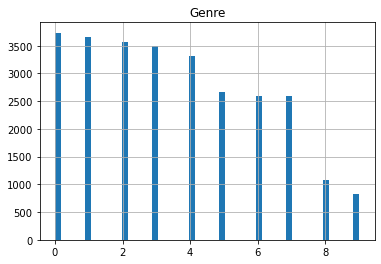

In [12]:
df.hist(column='Genre', bins=50)

# Feature set
### Let's define feature sets, X:

In [13]:
df.columns

Index(['Genre', 'AE_Mean', 'AE_Std', 'RMS_Mean', 'RMS_Std', 'ZCR_Mean',
       'ZCR_Std', 'SC_Mean', 'SC_Std', 'BW_Mean', 'BW_Std', 'MFCC0_Mean',
       'MFCC0_Std', 'MFCC1_Mean', 'MFCC1_Std', 'MFCC2_Mean', 'MFCC2_Std',
       'MFCC3_Mean', 'MFCC3_Std', 'MFCC4_Mean', 'MFCC4_Std', 'MFCC5_Mean',
       'MFCC5_Std', 'MFCC6_Mean', 'MFCC6_Std', 'MFCC7_Mean', 'MFCC7_Std',
       'MFCC8_Mean', 'MFCC8_Std', 'MFCC9_Mean', 'MFCC9_Std', 'MFCC10_Mean',
       'MFCC10_Std', 'MFCC11_Mean', 'MFCC11_Std', 'MFCC12_Mean', 'MFCC12_Std'],
      dtype='object')

In [14]:
X = df[['Genre','AE_Mean', 'AE_Std', 'RMS_Mean', 'RMS_Std','ZCR_Mean', 'ZCR_Std', 'SC_Mean',
       'SC_Std', 'BW_Mean', 'BW_Std', 'MFCC0_Mean', 'MFCC0_Std', 'MFCC1_Mean','MFCC1_Std', 'MFCC2_Mean', 'MFCC2_Std', 'MFCC3_Mean', 'MFCC3_Std',
       'MFCC4_Mean', 'MFCC4_Std', 'MFCC5_Mean', 'MFCC5_Std', 'MFCC6_Mean',
       'MFCC6_Std', 'MFCC7_Mean', 'MFCC7_Std', 'MFCC8_Mean', 'MFCC8_Std',
       'MFCC9_Mean', 'MFCC9_Std', 'MFCC10_Mean', 'MFCC10_Std', 'MFCC11_Mean',
       'MFCC11_Std', 'MFCC12_Mean', 'MFCC12_Std' ]].values
X[0:5]

array([[ 5.00000000e+00,  4.13603750e-01,  3.36155900e-01,
         2.09676550e-01,  1.94918660e-01,  2.53762749e-02,
         2.95349592e-02,  7.11632055e+02,  6.59394434e+02,
         1.09376381e+03,  7.47848363e+02, -2.51371280e+02,
         1.21903320e+02,  1.29426320e+02,  5.34433000e+01,
         3.42903330e+01,  3.22700160e+01,  3.17153990e+01,
         1.61421130e+01,  1.96665530e+01,  1.60972820e+01,
         1.28200040e+01,  1.25124530e+01,  8.39412000e+00,
         1.16746200e+01,  8.47891300e+00,  9.97987400e+00,
         5.24046100e-01,  8.76307000e+00,  4.67865320e+00,
         1.01462280e+01, -6.36792100e-01,  9.80118750e+00,
         8.03112400e-01,  8.54736800e+00, -1.27159630e+00,
         7.95949400e+00],
       [ 5.00000000e+00,  7.18112050e-01,  1.68150000e-01,
         2.55997330e-01,  8.04239300e-02,  1.12043365e-01,
         5.94969345e-02,  2.43686112e+03,  6.96047869e+02,
         2.51550174e+03,  3.29149252e+02, -5.50085260e+00,
         5.46749200e+01,  8.71

In [15]:
y = df['Genre'].values
y[0:5]

array([5, 5, 5, 5, 5], dtype=int64)

## Normalize Data
Data Standardization gives the data zero mean and unit variance, it is a good practice, especially for algorithms such as KNN which is based on the distance of data points.

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 5.70219963e-01, -3.64268854e-01,  2.07161593e+00,
         1.63889346e-01,  2.67210033e+00, -1.81059620e+00,
        -1.00275256e+00, -2.17385818e+00, -2.76811000e-01,
        -2.27197565e+00,  1.35583625e+00, -7.93811848e-01,
         1.14597543e+00,  1.03441944e+00,  1.88032075e+00,
         2.14068081e+00,  1.57141370e+00,  3.95258104e-01,
        -2.95174165e-02,  2.20802740e+00,  5.09416004e-01,
         2.54788316e-01,  1.12413840e-02,  1.89457393e+00,
         1.35425623e-01,  6.01559819e-02, -1.49399324e-01,
         1.11197105e+00, -5.03214700e-01, -4.69482491e-01,
         1.20015722e-01,  9.88705784e-01,  2.20379567e-01,
        -8.69502532e-01, -1.12456651e-01,  9.39699792e-01,
        -2.89982556e-01],
       [ 5.70219963e-01,  9.65377934e-01, -1.74117162e-01,
         6.53028300e-01, -1.28426377e-01,  6.38389722e-01,
         1.54013750e-01,  9.44780992e-01, -1.43509340e-01,
         9.79131268e-01, -8.09949585e-01,  8.23801882e-01,
        -4.92870043e-01, -4.69

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (22000, 37) (22000,)
Test set:  (5501, 37) (5501,)


# Classification
## K nearest neighbour (KNN)
### Import library

In [18]:
from sklearn.neighbors import KNeighborsClassifier

### Training
let's start with algorithm with k=4 for now:

In [19]:
k = 4

#train model and predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting
We can use model to make predictions on the test set:

In [20]:
pred = neigh.predict(X_test)
pred[0:5]

array([1, 1, 7, 1, 6], dtype=int64)

### Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [21]:
from sklearn import metrics
print('Train set accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, pred))

Train set accuracy:  0.8175454545454546
Test set accuracy:  0.6835120887111434


### Practice
Building the model again, but this time with k=6

In [22]:
#Training
k = 6

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh6

KNeighborsClassifier(n_neighbors=6)

In [23]:
#Predicting
pred6 = neigh6.predict(X_test)
pred6[0:5]

array([0, 1, 7, 1, 6], dtype=int64)

In [24]:
#accuracy evaluation
print('Train set accuracy: ', metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, pred6))

Train set accuracy:  0.785
Test set accuracy:  0.6731503363024904


## What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [25]:
K = 10

mean = np.zeros((K-1))
std = np.zeros((K-1))

for n in range(1, K):
    
    #Train model and predit
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    pred = neigh.predict(X_test)
    
    mean[n-1] = metrics.accuracy_score(y_test, pred)
    std[n-1] = np.std(pred == y_test)/np.sqrt(pred.shape[0])
    
mean

array([0.71896019, 0.68060353, 0.68532994, 0.68351209, 0.68260316,
       0.67315034, 0.66733321, 0.65969824, 0.64879113])

#### Plot the model accuracy for a different number of neighbors

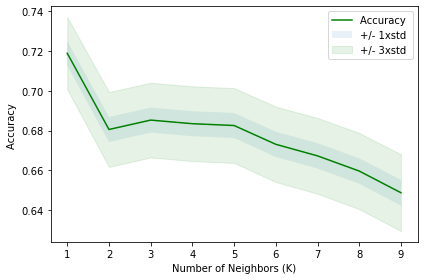

In [26]:
plt.plot(range(1, K), mean, 'g')
plt.fill_between(range(1,K),mean - 1 * std,mean + 1 * std, alpha=0.10)
plt.fill_between(range(1,K),mean - 3 * std,mean + 3 * std, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print('The best accuracy was with: ', mean.max(), 'with k=', mean.argmax()+1)

The best accuracy was with:  0.7189601890565351 with k= 1
